In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import suaBibSignal as sb
import sounddevice as sd
import matplotlib.pyplot as plt
import soundfile   as sf
import time
import peakutils


import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal as window



In [3]:
fs  = 44100   # pontos por segundo (frequência de amostragem)
A   = 1.5   # Amplitude
F   = 1     # Hz
T   = 4     # Tempo em que o seno será gerado
t   = np.linspace(-T/2,T/2,T*fs)
signal = sb.signalMeu()

In [4]:
    def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 60.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

### Carregando e ouvindo audio origianl

In [6]:
audio, samplerate = sf.read('sample.wav')

In [27]:
sd.play(audio)

### Normalizando e ouvindo audio

In [23]:
maxi = max(audio)
mini = min(audio)
print(maxi,mini)
# normaudio = (audio - maxi)/(maxi - mini)
normaudio = audio/abs(mini)

0.3197021484375 -0.34698486328125


In [26]:
sd.play(normaudio)

### Filtrando e ouvindo audio

In [13]:
audioFiltrado = LPF(normaudio, 4000, fs)

/Users/h.t/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [15]:
sd.play(audioFiltrado)

### Modulando audio e ouvindo

In [16]:
x, sinCarrier = signal.generateSin(14000, A,3, fs) 

In [17]:
audioModulado = audioFiltrado * sinCarrier

In [24]:
sd.play(audioModulado)

### Demodulando audio e ouvindo

In [19]:
audioDemodulado = audioModulado * sinCarrier

In [28]:
sd.play(audioDemodulado)

# Resultado

## Plot do audio original e da frequência no tempo

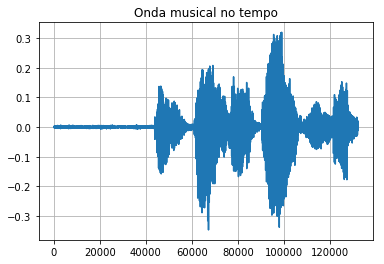

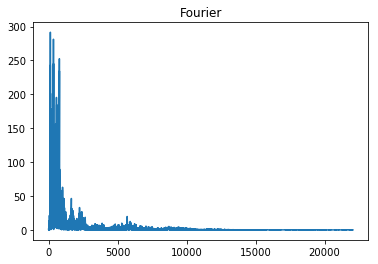

In [22]:
plt.plot(audio)
plt.title("Onda musical no tempo")
plt.grid()
signal.plotFFT(audio, fs)

## Plot do audio normalizado e da frequência no tempo

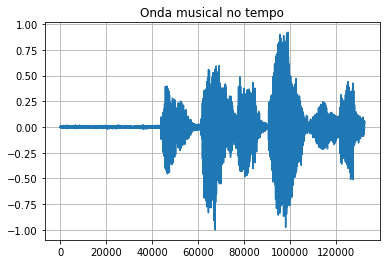

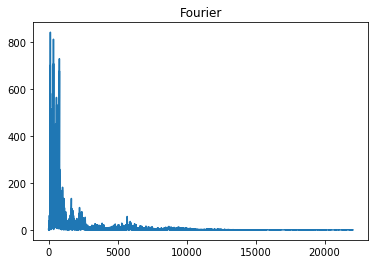

In [12]:
plt.plot(normaudio)
plt.title("Onda musical no tempo")
plt.grid()
signal.plotFFT(normaudio, fs)

## Plot do audio filtrado e da frequência no tempo

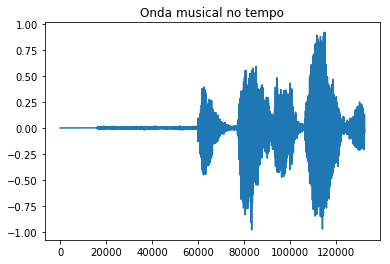

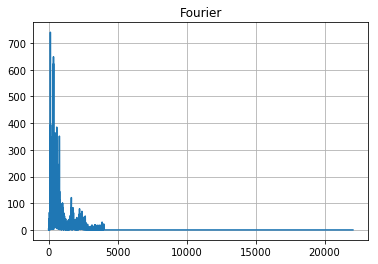

In [14]:
plt.plot(audioFiltrado)
plt.title("Onda musical no tempo")
signal.plotFFT(audioFiltrado, fs)
plt.grid()

## Plot do audio modulado e da frequência no tempo

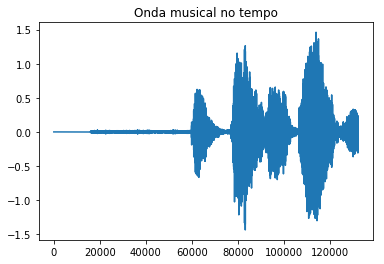

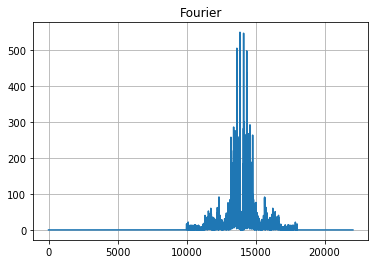

In [18]:
plt.plot(audioModulado)
plt.title("Onda musical no tempo")
signal.plotFFT(audioModulado, fs)
plt.grid()

## Plot do audio demodulado e da frequência no tempo

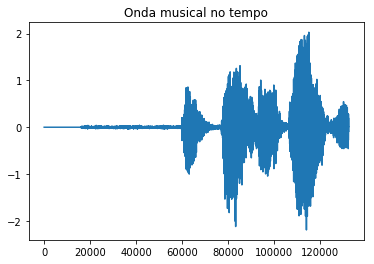

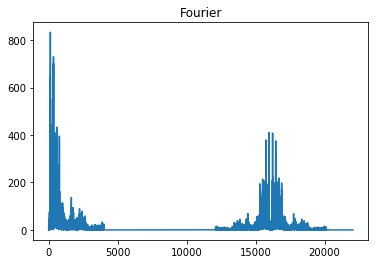

In [20]:
plt.plot(audioDemodulado)
plt.title("Onda musical no tempo")
signal.plotFFT(audioDemodulado, fs)